# Project 2

# Used Vehicle Price Prediction

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [62]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
data = pd.read_csv('../datasets/dataTrain_carListings.zip')

In [64]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [65]:
data.shape

(500000, 6)

In [66]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

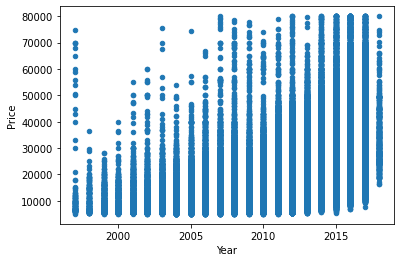

In [67]:
data.plot(kind='scatter', y='Price', x='Year')

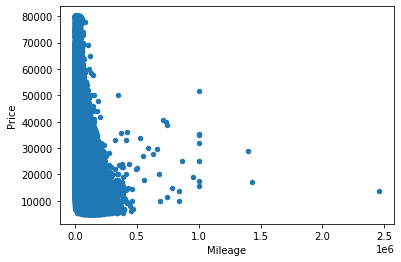

In [68]:
data.plot(kind='scatter', y='Price', x='Mileage')

In [69]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

# Exercise P2.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

#### Evaluation:
- 25% - Performance of the models using a manually implemented K-Fold (K=10) cross-validation
- 25% - Notebook explaining the process for selecting the best model. You must specify how the calibration of each of the parameters is done and how these change the performance of the model. It is expected that a clear comparison will be made of all implemented models.. Present the most relevant conslusions about the whole process. 


In [70]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [71]:
#Revision de missing values
data.isnull().sum()

Price      0
Year       0
Mileage    0
State      0
Make       0
Model      0
dtype: int64

In [72]:
#Convirtiendo las variables a dummies
data = pd.get_dummies(data, columns=["State", "Make", "Model"])
data.head()

,Price,Year,Mileage,State_ AK,State_ AL,State_ AR,State_ AZ,State_ CA,State_ CO,State_ CT,...,Model_Yaris4dr,Model_YarisBase,Model_YarisLE,Model_Yukon,Model_Yukon2WD,Model_Yukon4WD,Model_Yukon4dr,Model_tC2dr,Model_xB5dr,Model_xD5dr
0,21490,2014,31909,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21250,2016,25741,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20925,2016,24633,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14500,2012,84026,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,32488,2013,22816,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
#Sample o base completa
data1 = data.copy()
#data1 = data.sample(frac=0.01, replace=True, random_state=1)
#data1.shape

(5000, 617)

In [74]:
# define X and y
X = data1.loc[:, data1.columns != 'Price']
y = data1.Price
y.shape

(5000,)

In [75]:
#Separacion de train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state=1)

print(f'  Tamaño del train: {len(X_train):,}')
print(f'  Tamaño del test: {len(X_test):,}')

  Tamaño del train: 3,500
   Tamaño del test: 1,500


In [76]:
#Corrida inicial con scikit learn. 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

rf_reg = RandomForestRegressor()    
rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)

cv_scores_rf = cross_val_score(rf_reg, X_train, y_train, cv=10, n_jobs=3)
print("R^2: {}".format(rf_reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error: {}".format(rmse))
print("Mean 10-Fold CV Score: {}".format(np.mean(cv_scores_rf)))

print(cv_scores_rf)

C:\Users\stuka\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R^2: 0.728784967937095
Root Mean Squared Error: 5689.952239706997
Mean 10-Fold CV Score: 0.6985937285485123
[0.6221858  0.74911368 0.75997102 0.66766763 0.61555179 0.71597429
 0.6745963  0.79054492 0.71958031 0.67075155]


In [77]:
# Tuning N-Stimators
# list of values to try for n_estimators
estimator_range = range(10, 200, 10)

# list to store the average Accuracy for each value of n_estimators
accuracy_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    rf_regF = RandomForestRegressor(n_estimators=estimator, random_state=1, n_jobs=3)
    rf_regF.fit(X_train, y_train)

    y_pred_rf = rf_regF.predict(X_test)

    cv_scores_rf = cross_val_score(rf_regF, X_train, y_train, cv=10, n_jobs=3)
    print("R^2: {}".format(rf_regF.score(X_test, y_test)))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
    accuracy_scores.append(rmse)
    print("Root Mean Squared Error: {}".format(rmse))
    print("Mean 10-Fold CV Score: {}".format(np.mean(cv_scores_rf)))

    print(cv_scores_rf)

R^2: 0.7130671611961312
Root Mean Squared Error: 5852.506036092003
Mean 10-Fold CV Score: 0.7006487087619793
[0.68128222 0.77250892 0.76340557 0.6646007  0.64774795 0.70033134
 0.65071128 0.73309679 0.7171845  0.67561782]
R^2: 0.7260369865809926
Root Mean Squared Error: 5718.7052107459895
Mean 10-Fold CV Score: 0.7145705562011645
[0.67585408 0.77362523 0.77523234 0.66895565 0.66169651 0.72251293
 0.69360733 0.75056943 0.73249178 0.69116029]
R^2: 0.7293704854612727
Root Mean Squared Error: 5683.806992576497
Mean 10-Fold CV Score: 0.7143551032564865
[0.66439256 0.76992444 0.77331119 0.67054691 0.66459122 0.72521053
 0.69126743 0.75664206 0.73859198 0.68907272]
R^2: 0.7317569923778457
Root Mean Squared Error: 5658.690586987417
Mean 10-Fold CV Score: 0.716808650350581
[0.65407461 0.77382972 0.77493368 0.67283233 0.67663493 0.72997267
 0.69227255 0.76516753 0.73770339 0.69066508]
R^2: 0.732601082132767
Root Mean Squared Error: 5649.780371084502
Mean 10-Fold CV Score: 0.7162456008475793
[0.6

El mejor N-estimador es 180

Text(0, 0.5, 'RMSE')

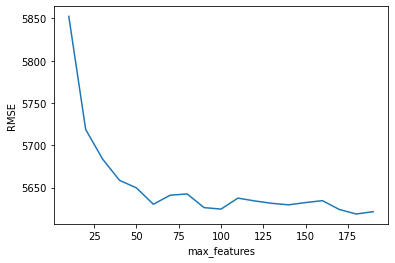

In [80]:
plt.plot(estimator_range, accuracy_scores)
plt.xlabel('N_Estimators')
plt.ylabel('RMSE')

In [98]:
# Tuning Max_Features
# list of values to try for n_estimators
c = len(X.columns)
c = c+1
c
feature_range = range(1, c)

# list to store the average Accuracy for each value of n_estimators
accuracy_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for feature in feature_range:
    rf_regF = RandomForestRegressor(n_estimators=190, max_features=feature, random_state=1, n_jobs=3)
    rf_regF.fit(X_train, y_train)

    y_pred_rf = rf_regF.predict(X_test)

    cv_scores_rf = cross_val_score(rf_regF, X_train, y_train, cv=2, n_jobs=3)
    print("R^2: {}".format(rf_regF.score(X_test, y_test)))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
    accuracy_scores.append(rmse)
    print("Root Mean Squared Error: {}".format(rmse))
    print("Mean 10-Fold CV Score: {}".format(np.mean(cv_scores_rf)))

    print(cv_scores_rf)

R^2: 0.7022584904331348
Root Mean Squared Error: 5961.718088351749
Mean 10-Fold CV Score: 0.6425947292613818
[0.63199794 0.65319152]
R^2: 0.7138085462071779
Root Mean Squared Error: 5844.940212189573
Mean 10-Fold CV Score: 0.6493289100771511
[0.63861332 0.6600445 ]
R^2: 0.7195745322127107
Root Mean Squared Error: 5785.760727304235
Mean 10-Fold CV Score: 0.661854457247455
[0.65253049 0.67117842]
R^2: 0.7304967949252448
Root Mean Squared Error: 5671.967189717409
Mean 10-Fold CV Score: 0.6632223807504443
[0.65428599 0.67215877]
R^2: 0.7342348268114416
Root Mean Squared Error: 5632.4945109437485
Mean 10-Fold CV Score: 0.6718981064486902
[0.65963823 0.68415798]
R^2: 0.739106369858914
Root Mean Squared Error: 5580.633227487835
Mean 10-Fold CV Score: 0.6750290602657909
[0.66428812 0.68577001]
R^2: 0.7435765567317096
Root Mean Squared Error: 5532.616996047469
Mean 10-Fold CV Score: 0.6815861956609675
[0.67315933 0.69001307]
R^2: 0.7442965840255559
Root Mean Squared Error: 5524.843846291786
Mea

Text(0, 0.5, 'RMSE')

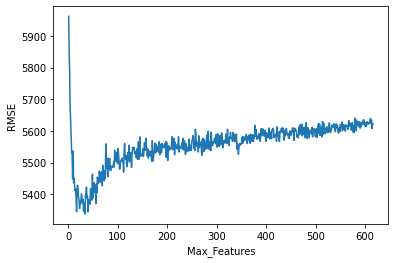

In [100]:
plt.plot(feature_range, accuracy_scores)
plt.xlabel('Max_Features')
plt.ylabel('RMSE')

El mejor max features es 40

In [105]:
feature_cols = X.columns
pd.DataFrame({'feature':feature_cols, 'importance':rf_regF.feature_importances_}).sort_values('importance')

,feature,importance
307,Model_FocusS,0.000000
262,"Model_Excursion137""",0.000000
281,Model_F-150King,0.000000
283,Model_F-150Limited,0.000000
293,Model_F-350King,0.000000
...,...,...
65,Make_GMC,0.027195
508,Model_Silverado,0.032142
529,Model_Super,0.036014
1,Mileage,0.139210


In [106]:
#Mejor Random Forest
rf_regB = RandomForestRegressor(n_estimators=190, max_features=40, random_state=1, n_jobs=3)    
rf_regB.fit(X_train, y_train)

y_pred_rf = rf_regB.predict(X_test)

cv_scores_rf = cross_val_score(rf_regB, X_train, y_train, cv=10, n_jobs=3)
print("R^2: {}".format(rf_regB.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error: {}".format(rmse))
print("Mean 10-Fold CV Score: {}".format(np.mean(cv_scores_rf)))

print(cv_scores_rf)

R^2: 0.7607949260290838
Root Mean Squared Error: 5343.636855212923
Mean 10-Fold CV Score: 0.7419131495353944
[0.70841259 0.77091144 0.7821249  0.67197408 0.69705359 0.76862203
 0.72853565 0.80037664 0.76195527 0.72916531]


In [115]:
#kfold a mano
from sklearn.model_selection import KFold
splitsKF = 10

kf = KFold(n_splits = splitsKF, shuffle = True)
rf_regT = RandomForestRegressor(n_estimators=190, max_features=40, random_state=1, n_jobs=3)

scores = []
for i in range(splitsKF):
    result = next(kf.split(X), None)
    x_train = X.iloc[result[0]]
    x_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    model = rf_regT.fit(x_train,y_train)
    predictions = rf_regT.predict(x_test)
    print("R^2: {}".format(rf_regT.score(x_test, y_test)))
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    scores.append(model.score(x_test,y_test))
    accuracy_scores.append(rmse)
    print("Root Mean Squared Error: {}".format(rmse))
    print("Mean 10-Fold CV Score: {}".format(np.mean(scores)))


R^2: 0.7858372044167573
Root Mean Squared Error: 5250.505206070251
Mean 10-Fold CV Score: 0.7858372044167573
R^2: 0.8033004794806431
Root Mean Squared Error: 4699.6099906508125
Mean 10-Fold CV Score: 0.7945688419487003
R^2: 0.7933670939379822
Root Mean Squared Error: 4908.3887816981305
Mean 10-Fold CV Score: 0.7941682592784609
R^2: 0.799801903701311
Root Mean Squared Error: 5036.793424770441
Mean 10-Fold CV Score: 0.7955766703841735
R^2: 0.7743619863460778
Root Mean Squared Error: 5074.899843883073
Mean 10-Fold CV Score: 0.7913337335765543
R^2: 0.8024639125146716
Root Mean Squared Error: 4778.963661386103
Mean 10-Fold CV Score: 0.7931887633995739
R^2: 0.7958344615652629
Root Mean Squared Error: 4955.491531224578
Mean 10-Fold CV Score: 0.7935667202803866
R^2: 0.7595397819447498
Root Mean Squared Error: 5146.649736489493
Mean 10-Fold CV Score: 0.789313352988432
R^2: 0.79506490641675
Root Mean Squared Error: 4836.898397987182
Mean 10-Fold CV Score: 0.7899524144804673
R^2: 0.75492922803186

In [ ]:
#kfold a mano con FULL data:
from sklearn.model_selection import KFold
splitsKF = 10

kf = KFold(n_splits = splitsKF, shuffle = True)
rf_regT = RandomForestRegressor(n_estimators=190, max_features=40, random_state=1, n_jobs=3)

scores = []
for i in range(splitsKF):
    result = next(kf.split(X), None)
    x_train = X.iloc[result[0]]
    x_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    model = rf_regT.fit(x_train,y_train)
    predictions = rf_regT.predict(x_test)
    print("R^2: {}".format(rf_regT.score(x_test, y_test)))
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    scores.append(model.score(x_test,y_test))
    accuracy_scores.append(rmse)
    print("Root Mean Squared Error: {}".format(rmse))
    print("Mean 10-Fold CV Score: {}".format(np.mean(scores)))

Al correr el modelo con full datos encontramos que el modelo tiene un RMSE de 3830 y R2 de 87%, Siendo el mejor modelo que tenemos frente:

- RFRegressor - RMSE: 3468 - sample 60%
- XGBOOST - RMSE: 4800 - sample 100%
- TreeRegressor - RMSE: 300 - sample 5%
- BaggedTreeRegressor - RMSE: 4224 - Sample 10%

Finalmente, el modelo implementado en la API de AWS fue u RFRegressor con un RMSE: 4723 y un sample de 5%

# Exercise P2.2 (50%)

Create an API of the model.

#### Captura de pantalla con la API corriendo en localhost
![](https://raw.githubusercontent.com/danieleon95/proyecto2-modelos/master/Captura.PNG)

#### Captura de pantalla con la API corriendo en AWS
![](https://raw.githubusercontent.com/danieleon95/proyecto2-modelos/master/Captura2.PNG)

#### Captura de pantalla con la API corriendo en AWS
![](https://raw.githubusercontent.com/danieleon95/proyecto2-modelos/master/Captura3.PNG)